## Setup

In [2]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [4]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 29 columns):
EVENT_ID              8191 non-null int64
INJURIES_DIRECT       8191 non-null int64
DEATHS_DIRECT         8191 non-null int64
DAMAGE_PROPERTY       8191 non-null float64
DAMAGE_CROPS          8191 non-null float64
DURATION_SECONDS      8191 non-null float64
BEGIN_LAT             8191 non-null float64
BEGIN_LON             8191 non-null float64
TOR_LENGTH            8191 non-null float64
TOR_WIDTH             8191 non-null float64
BEGIN_DATE_TIME       8191 non-null float64
YEAR                  8191 non-null int64
CZ_NAME               8191 non-null object
OPEN_WATER_PROP       8191 non-null float64
DEV_OPEN_PROP         8191 non-null float64
DEV_LOW_PROP          8191 non-null float64
DEV_MED_PROP          8191 non-null float64
DEV_HIGH_PROP         8191 non-null float64
DECID_FOREST_PROP     8191 non-null float64
EVERGR_FOREST_PROP    8191 non-null float64
MIXED_FOREST_PROP     

In [10]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:, [3]].astype(float)


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 1 columns):
DAMAGE_PROPERTY    8191 non-null float64
dtypes: float64(1)
memory usage: 64.1 KB


In [11]:
# The independent variables
tornado_features = tor_df.iloc[:, 5:]


# Get rid of non-location and non-landcover variables
tornado_features = tornado_features.drop(["YEAR",
                                          "CZ_NAME"],
                                         axis = 1)


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 22 columns):
DURATION_SECONDS      8191 non-null float64
BEGIN_LAT             8191 non-null float64
BEGIN_LON             8191 non-null float64
TOR_LENGTH            8191 non-null float64
TOR_WIDTH             8191 non-null float64
BEGIN_DATE_TIME       8191 non-null float64
OPEN_WATER_PROP       8191 non-null float64
DEV_OPEN_PROP         8191 non-null float64
DEV_LOW_PROP          8191 non-null float64
DEV_MED_PROP          8191 non-null float64
DEV_HIGH_PROP         8191 non-null float64
DECID_FOREST_PROP     8191 non-null float64
EVERGR_FOREST_PROP    8191 non-null float64
MIXED_FOREST_PROP     8191 non-null float64
SHRUB_SCRUB_PROP      8191 non-null float64
GRASS_LAND_PROP       8191 non-null float64
PASTURE_HAY_PROP      8191 non-null float64
CULT_CROPS_PROP       8191 non-null float64
WOOD_WETLAND_PROP     8191 non-null float64
HERB_WETLAND_PROP     8191 non-null float64
BARREN_LAND_P

In [12]:
# See the (order of) independent variables
tornado_features.head()

,DURATION_SECONDS,BEGIN_LAT,BEGIN_LON,TOR_LENGTH,TOR_WIDTH,BEGIN_DATE_TIME,OPEN_WATER_PROP,DEV_OPEN_PROP,DEV_LOW_PROP,DEV_MED_PROP,...,EVERGR_FOREST_PROP,MIXED_FOREST_PROP,SHRUB_SCRUB_PROP,GRASS_LAND_PROP,PASTURE_HAY_PROP,CULT_CROPS_PROP,WOOD_WETLAND_PROP,HERB_WETLAND_PROP,BARREN_LAND_PROP,ICE_SNOW_PROP
0,-0.482060,-1.055288,-0.049140,-0.273517,-0.323763,0.471303,-0.084825,-0.689188,-0.365558,-0.334206,...,2.794717,0.360094,-0.135041,-0.535067,-0.702297,-0.874761,3.937253,-0.021086,-0.175143,-0.008558
1,-0.482060,1.023294,-1.376698,-0.533644,-0.526210,0.320941,-0.296172,-0.811892,-0.483319,-0.334206,...,-0.152904,-0.451869,-0.438426,2.988996,-0.703950,-0.534193,-0.463273,-0.245924,0.298127,-0.008558
2,-0.339438,-0.728648,0.995685,-0.015236,0.136344,0.417916,-0.014587,0.909916,0.312018,-0.272712,...,1.676468,-0.344735,-0.286506,-0.430035,0.303384,-0.874761,0.210036,-0.235770,-0.063537,-0.008558
3,-0.624682,-0.356522,-0.279291,-0.404503,-0.323763,1.030707,-0.212051,-0.080748,-0.338449,-0.308254,...,-0.467883,0.187825,-0.315586,-0.294529,3.073179,-0.859710,-0.399695,-0.245924,0.094128,-0.008558
4,-0.482060,-2.023333,1.296535,-0.371295,-0.489402,0.218706,-0.229115,0.214868,0.037409,-0.297319,...,-0.192575,-0.430730,0.211257,-0.368029,0.997784,-0.655868,2.269173,1.094048,2.114103,-0.008558


In [13]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


-4.2553e-02
-4.2553e-02
-4.1857e-02
     ⋮      
-4.2553e-02
-4.2553e-02
-4.2275e-02
[torch.DoubleTensor of size 8191x1]

In [14]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


-4.8206e-01 -1.0553e+00 -4.9140e-02  ...  -2.1086e-02 -1.7514e-01 -8.5583e-03
-4.8206e-01  1.0233e+00 -1.3767e+00  ...  -2.4592e-01  2.9813e-01 -8.5583e-03
-3.3944e-01 -7.2865e-01  9.9568e-01  ...  -2.3577e-01 -6.3537e-02 -8.5583e-03
                ...                   ⋱                   ...                
-6.2468e-01  9.2060e-01  4.0236e-01  ...  -2.4592e-01 -2.1294e-02 -8.5583e-03
-4.8206e-01  1.2141e+00 -2.3378e-01  ...  -2.0819e-01 -1.7514e-01 -8.5583e-03
-3.3944e-01  9.2537e-01  1.7482e+00  ...   5.7597e-04  3.5189e-01 -8.5583e-03
[torch.DoubleTensor of size 8191x22]

### Convert DoubleTensor to FloatTensor

In [15]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


-4.8206e-01 -1.0553e+00 -4.9140e-02  ...  -2.1086e-02 -1.7514e-01 -8.5583e-03
-4.8206e-01  1.0233e+00 -1.3767e+00  ...  -2.4592e-01  2.9813e-01 -8.5583e-03
-3.3944e-01 -7.2865e-01  9.9568e-01  ...  -2.3577e-01 -6.3537e-02 -8.5583e-03
                ...                   ⋱                   ...                
-6.2468e-01  9.2060e-01  4.0236e-01  ...  -2.4592e-01 -2.1294e-02 -8.5583e-03
-4.8206e-01  1.2141e+00 -2.3378e-01  ...  -2.0819e-01 -1.7514e-01 -8.5583e-03
-3.3944e-01  9.2537e-01  1.7482e+00  ...   5.7597e-04  3.5189e-01 -8.5583e-03
[torch.FloatTensor of size 8191x22]

## Round 1: One-Hidden-Layer Neural Network

In [16]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [17]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 1))

In [18]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [19]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 4e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and print the current summed error
    loss = loss_fn(y_pred, outcomes_Variable)
    print(t, loss.data[0])
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 13648.65625
1 13559.5009765625
2 13487.2177734375
3 13427.310546875
4 13376.8388671875
5 13333.6318359375
6 13296.0283203125
7 13262.892578125
8 13233.279296875
9 13206.5361328125
10 13182.1533203125
11 13159.80859375
12 13139.07421875
13 13119.7451171875
14 13101.677734375
15 13084.7080078125
16 13068.69140625
17 13053.5185546875
18 13039.162109375
19 13025.525390625
20 13012.5029296875
21 13000.0439453125
22 12988.2216796875
23 12976.943359375
24 12966.0830078125
25 12955.701171875
26 12945.7666015625
27 12936.197265625
28 12927.02734375
29 12918.2314453125
30 12909.775390625
31 12901.58984375
32 12893.8232421875
33 12886.271484375
34 12879.00390625
35 12872.0185546875
36 12865.28125
37 12858.7978515625
38 12852.5185546875
39 12846.47265625
40 12840.634765625
41 12835.0009765625
42 12829.544921875
43 12824.2587890625
44 12819.162109375
45 12814.212890625
46 12809.474609375
47 12804.82421875
48 12800.375
49 12796.0703125
50 12791.8876953125
51 12787.830078125
52 12783.896484375
53 1

In [20]:
# Get the iterations
iterations = list(range(0, 10000))

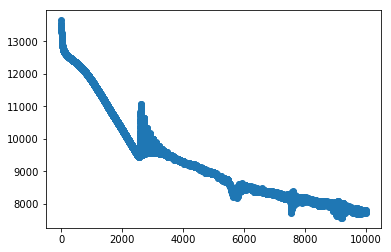

In [21]:
# Plot summer error as a function of iteration
plt.scatter(iterations, errors)

In [22]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8191)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [23]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(8191)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

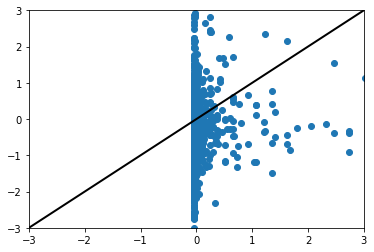

In [24]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

### Round 1.1: Validation Set Performance

In [50]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [3]].astype(float)


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)

In [51]:
# Validation set predictors
valid_predictors = valid_df.iloc[:, 5:]

valid_predictors = valid_predictors.drop(["YEAR",
                                          "CZ_NAME"],
                                         axis = 1)


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)

In [52]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(15, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight


# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 14419.5635
[torch.FloatTensor of size 1]

In [53]:
valid_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2731 entries, 0 to 2730
Data columns (total 22 columns):
DURATION_SECONDS      2731 non-null float64
BEGIN_LAT             2731 non-null float64
BEGIN_LON             2731 non-null float64
TOR_LENGTH            2731 non-null float64
TOR_WIDTH             2731 non-null float64
BEGIN_DATE_TIME       2731 non-null float64
OPEN_WATER_PROP       2731 non-null float64
DEV_OPEN_PROP         2731 non-null float64
DEV_LOW_PROP          2731 non-null float64
DEV_MED_PROP          2731 non-null float64
DEV_HIGH_PROP         2731 non-null float64
DECID_FOREST_PROP     2731 non-null float64
EVERGR_FOREST_PROP    2731 non-null float64
MIXED_FOREST_PROP     2731 non-null float64
SHRUB_SCRUB_PROP      2731 non-null float64
GRASS_LAND_PROP       2731 non-null float64
PASTURE_HAY_PROP      2731 non-null float64
CULT_CROPS_PROP       2731 non-null float64
WOOD_WETLAND_PROP     2731 non-null float64
HERB_WETLAND_PROP     2731 non-null float64
BARREN_LAND_P

In [54]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2731)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [55]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(2731)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

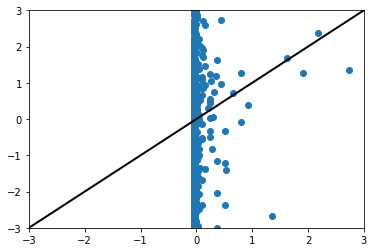

In [56]:
# Plot new predictions versus 'new' data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

## Round 2: Two-Hidden-Layer Neural Network

In [57]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [58]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 1))

In [59]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 4e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and print the current summed error
    loss = loss_fn(y_pred, outcomes_Variable)
    print(t, loss.data[0])
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 13166.23828125
1 13162.837890625
2 13159.7353515625
3 13156.822265625
4 13154.0751953125
5 13151.4482421875
6 13148.9482421875
7 13146.5439453125
8 13144.2275390625
9 13141.9501953125
10 13139.6689453125
11 13137.443359375
12 13135.31640625
13 13133.1904296875
14 13131.095703125
15 13129.033203125
16 13127.0556640625
17 13125.099609375
18 13123.181640625
19 13121.240234375
20 13119.3056640625
21 13117.38671875
22 13115.478515625
23 13113.5615234375
24 13111.6630859375
25 13109.7802734375
26 13107.880859375
27 13106.0302734375
28 13104.14453125
29 13102.2666015625
30 13100.392578125
31 13098.5283203125
32 13096.6640625
33 13094.8154296875
34 13092.951171875
35 13091.0771484375
36 13089.1962890625
37 13087.27734375
38 13085.384765625
39 13083.4912109375
40 13081.564453125
41 13079.6552734375
42 13077.7490234375
43 13075.83203125
44 13073.896484375
45 13071.9619140625
46 13069.9892578125
47 13068.05078125
48 13066.08203125
49 13064.12890625
50 13062.140625
51 13060.162109375
52 13058.17

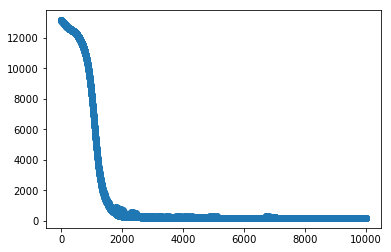

In [60]:
# Plot summer error as a function of iteration
plt.scatter(iterations, errors)

In [61]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8191)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

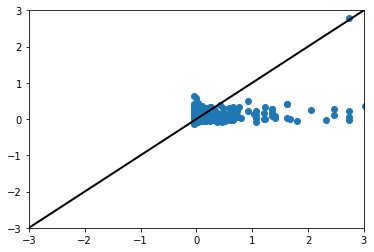

In [62]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

### Round 2.1: Validation Set Performance

In [63]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(15, 10),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(10, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight


# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 16583.5918
[torch.FloatTensor of size 1]

In [64]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2731)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

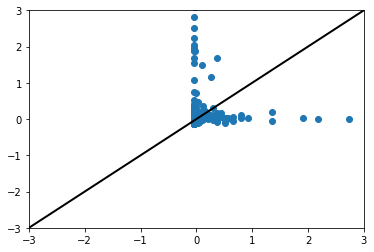

In [65]:
# Plot new predictions versus 'new' data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

## Round 3: Three-Hidden-Layer Neural Network

In [67]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [68]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                            torch.nn.ReLU(),
                            torch.nn.Linear(15, 10),
                            torch.nn.ReLU(),
                            torch.nn.Linear(10, 7),
                            torch.nn.ReLU(),
                            torch.nn.Linear(7, 1))

In [69]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 4e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and print the current summed error
    loss = loss_fn(y_pred, outcomes_Variable)
    print(t, loss.data[0])
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 13798.1123046875
1 13693.85546875
2 13605.296875
3 13529.9794921875
4 13465.943359375
5 13411.3349609375
6 13365.0146484375
7 13325.5986328125
8 13292.134765625
9 13263.6650390625
10 13239.5546875
11 13219.15234375
12 13201.82421875
13 13187.0947265625
14 13174.6796875
15 13164.1708984375
16 13155.1875
17 13147.5732421875
18 13141.134765625
19 13135.853515625
20 13131.31640625
21 13127.412109375
22 13123.9423828125
23 13120.9375
24 13118.2919921875
25 13115.9716796875
26 13113.873046875
27 13112.029296875
28 13110.1083984375
29 13108.3603515625
30 13106.5615234375
31 13104.93359375
32 13103.4775390625
33 13101.96484375
34 13100.509765625
35 13099.0654296875
36 13097.650390625
37 13096.224609375
38 13094.8203125
39 13093.3974609375
40 13091.9287109375
41 13090.46875
42 13089.013671875
43 13087.6005859375
44 13086.2451171875
45 13084.8427734375
46 13083.373046875
47 13081.912109375
48 13080.451171875
49 13078.9521484375
50 13077.4775390625
51 13076.005859375
52 13074.5185546875
53 1307

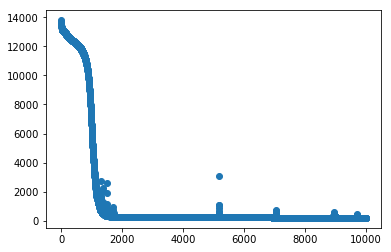

In [70]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [71]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8191)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

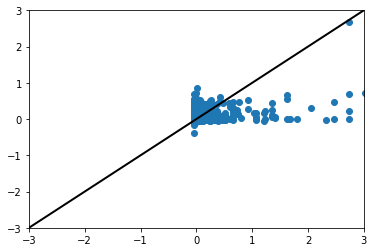

In [72]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

### Round 3.1: Validation Set Performance

In [88]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 15),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(15, 10),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(10, 7),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(7, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight
dim_corrected_model[(6)].weight = model[(6)].weight


# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 25974.2441
[torch.FloatTensor of size 1]

In [90]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2731)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

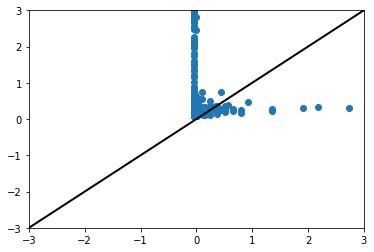

In [91]:
# Plot new predictions versus 'new' data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

## Round 4: Linear Regression

In [92]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [93]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(22, 1))

In [94]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and print the current summed error
    loss = loss_fn(y_pred, outcomes_Variable)
    print(t, loss.data[0])
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 16344.1962890625
1 16143.185546875
2 15955.6357421875
3 15780.580078125
4 15617.134765625
5 15464.2763671875
6 15321.287109375
7 15187.4072265625
8 15061.93359375
9 14944.283203125
10 14833.896484375
11 14730.19921875
12 14632.724609375
13 14541.048828125
14 14454.873046875
15 14373.5986328125
16 14297.0244140625
17 14224.8291015625
18 14156.658203125
19 14092.322265625
20 14031.4501953125
21 13973.888671875
22 13919.4912109375
23 13867.931640625
24 13819.05078125
25 13772.7431640625
26 13728.7548828125
27 13687.0625
28 13647.45703125
29 13609.76953125
30 13573.974609375
31 13539.8876953125
32 13507.4599609375
33 13476.57421875
34 13447.1494140625
35 13419.0205078125
36 13392.2705078125
37 13366.642578125
38 13342.2265625
39 13318.8896484375
40 13296.5625
41 13275.197265625
42 13254.8232421875
43 13235.26171875
44 13216.51171875
45 13198.5556640625
46 13181.361328125
47 13164.8388671875
48 13149.0439453125
49 13133.814453125
50 13119.205078125
51 13105.2041015625
52 13091.7275390625


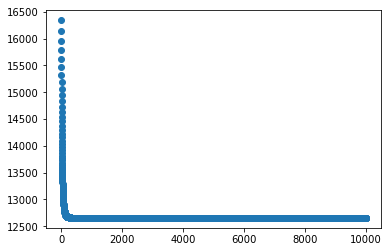

In [95]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [96]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8191)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

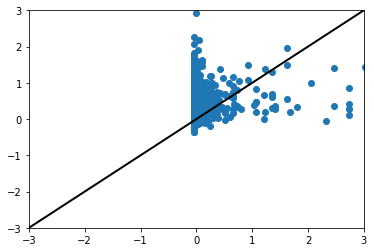

In [97]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)

### Round 4.1: Validation Set Performance

In [98]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(22, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight


# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 659.6626
[torch.FloatTensor of size 1]

In [99]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2731)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

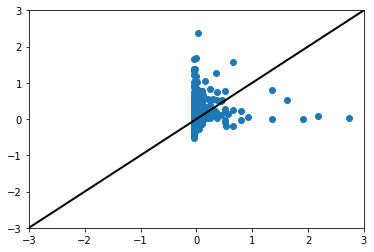

In [100]:
# Plot new predictions versus 'new' data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-3, 3])

axes.set_ylim([-3, 3])

plt.plot([-3, 3], [-3, 3], 'k-', lw=2)